In [146]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import numpy as np

In [147]:
sheepfile = nx.read_graphml('sheep_ml.graphml')

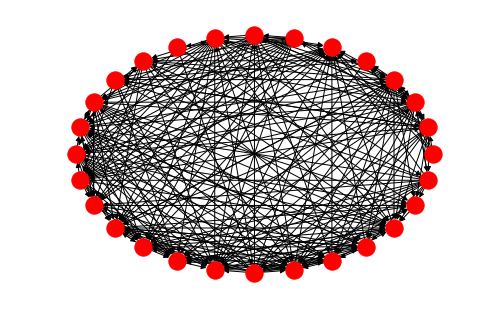

In [148]:
nx.draw_shell(sheepfile)

In [149]:
nodes = pd.read_csv('sheep_data/sheep_age.csv')
edges = pd.read_csv('sheep_data/sheep_edges.csv')

In [356]:
sumnumber = {}
for i in range(1,10):
    ids = nodes[nodes['age'] == i]['id'].values
#     print(ids)
    sumnumber[i] = [0,0]
    for j in ids:
        wins = edges[edges['source']==j]['weight'].sum()
        losses = edges[edges['target']==j]['weight'].sum()
        sumnumber[i][0] = sumnumber[i][0]+wins
        sumnumber[i][1] = sumnumber[i][1]+losses

In [155]:
def winrate(dic, agerange):
    wins = 0
    total = 0
    for i in agerange:
        wins = wins + sumnumber[i][0]
        total = total + sum(sumnumber[i])
    return ([total, wins/(total)])
(172+22)/(151+208+172+22)

0.3508137432188065

In [156]:
print("Sheeps ages 1-2 have average winrate of " + str(winrate(sumnumber,[1,2])[1]) + " out of " + str(winrate(sumnumber,[1,2])[0]) + ' Battles')
print("Sheeps ages 3-5 have average winrate of " + str(winrate(sumnumber,[3,4,5])[1]) + " out of " + str(winrate(sumnumber,[3,4,5])[0]) + ' Battles')
print("Sheeps ages 6-8 have average winrate of " + str(winrate(sumnumber,[6,7,8])[1]) + " out of " + str(winrate(sumnumber,[6,7,8])[0]) + ' Battles')
print("Sheeps ages 9+ have average winrate of " + str(winrate(sumnumber,[9])[1]) + " out of " + str(winrate(sumnumber,[9])[0]) + ' Battles')

Sheeps ages 1-2 have average winrate of 0.5325077399380805 out of 323 Battles
Sheeps ages 3-5 have average winrate of 0.40631163708086787 out of 507 Battles
Sheeps ages 6-8 have average winrate of 0.5747126436781609 out of 261 Battles
Sheeps ages 9+ have average winrate of 0.5777777777777777 out of 225 Battles


In [158]:
sheeps = nx.DiGraph()
for i in nodes.index:
    sheeps.add_node(nodes.iloc[i]['id'],age = nodes.iloc[i]['age'])

In [159]:
edges['ebunch'] = '0'
for i in edges.index.values:
    edges.at[i,'ebunch'] = (edges.iloc[i]['source'],edges.iloc[i]['target'],{'weight':edges.iloc[i]['weight']})
edges.head()

,source,target,weight,ebunch
0,1,2,1,"(1, 2, {'weight': 1})"
1,1,3,1,"(1, 3, {'weight': 1})"
2,1,4,1,"(1, 4, {'weight': 1})"
3,1,5,1,"(1, 5, {'weight': 1})"
4,1,6,1,"(1, 6, {'weight': 1})"


In [160]:
sheeps.add_edges_from(edges['ebunch'].values)

In [161]:
colorlist4 = ['#c7e9c0','#c7e9c0','#74c476','#74c476','#74c476','#41ab5d','#41ab5d','#41ab5d','#238b45']
colormap4 = [colorlist4[i-1] for i in nodes['age'].values]

In [162]:
pgrank = nx.pagerank(sheeps)
pgrank_invert = {i:35/pgrank[i] for i in list(pgrank.keys())}

In [349]:
agesbins = ['1-2','3-4','5-6','7-8','9']
agecolors = dict(zip(agesbins, colorlist3))
agesbins2 = ['    1-2: 53.3 WR% of 323','    3-5: 40.6 WR%  of 507','    6-8: 57.5 WR% out of 261','    9: 57.7 WR% of 225']
agecolors2 = dict(zip(agesbins2, ['#c7e9c0','#74c476','#41ab5d','#238b45']))

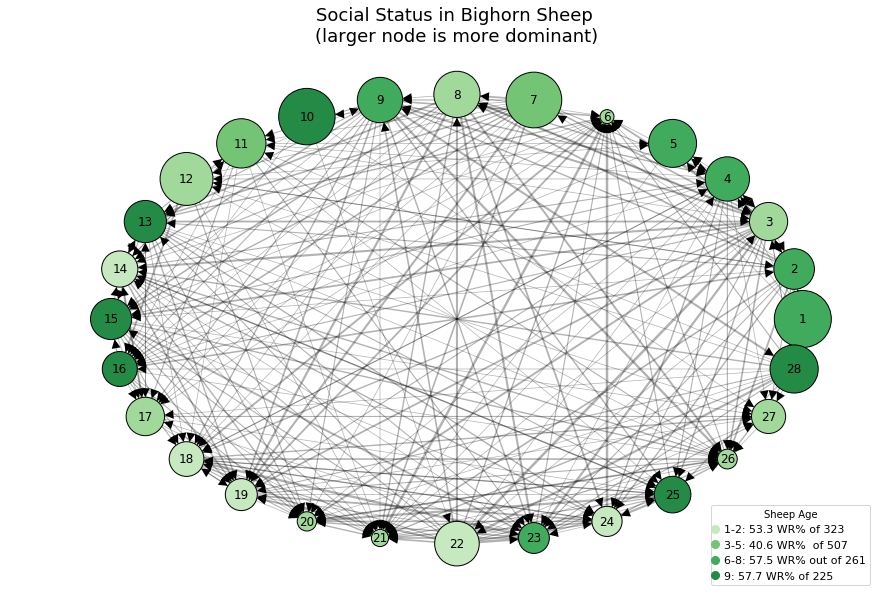

In [355]:
# plt.figure(figsize = (15,10))

pos = nx.shell_layout(sheeps)
# colors = [sheeps[u][v]['color'] for u,v in sheeps.edges()]
weights = [np.log1p(sheeps[u][v]['weight']) for u,v in sheeps.edges()]
# weights = [sheeps[u][v]['weight'] for u,v in sheeps.edges()]

# ages = [sheeps.nodes[i]['age']*200 for i in range(1,29)]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
for label in agesbins2:
    ax.plot([0],[0],color=(agecolors2[label]),label=label)    

    
# '-|>'
nx.draw_shell(sheeps,with_labels=True, node_color=colormap3,node_size=list(pgrank_invert.values())
              ,width=np.zeros(len(sheeps.edges())),arrowsize=15 ,arrowstyle = ('-|>, head_length=.6, head_width=.3'))
nx.draw_networkx_edges(sheeps,pos=pos,alpha=0.3,width=weights)
# nx.draw_networkx_labels(sheeps, pos = pos, labels = dict(list(zip(nodes['id'].values,nodes['age'].values))))
ax.collections[0].set_edgecolor("#000000") 
plt.title('Social Status in Bighorn Sheep \n(larger node is more dominant)',fontsize=18)


legend = ax.legend(title='Sheep Age',fontsize = 14,loc='lower right', prop = {'size': 11}, handletextpad=-2.5)
for line in legend.get_lines():
    line.set_marker('o')
    line.set_markevery(2)
    line.set_dash_joinstyle('bevel')
    line.set_fillstyle('full')
    #line.set_linestyle('none')
    line.set_markersize(8)
    line.set_linewidth(0)
    line.set_linestyle('solid')

    


fig.savefig('lama.png')

plt.show()
#plt.tight_layout()
